In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/data.csv', encoding='latin1')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Check No.of Rows & column

In [6]:
df.shape

(541909, 8)

COLUMN NAMES

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

DATA TYPES

In [8]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


DATA CLEANING


In [9]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


REMOVE MISSING VALUES

In [10]:
df =  df.dropna(subset=['Description','CustomerID'])

In [11]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


CONVERT INVOICEDATE TO DATE FORMAT

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

CONVERT CUSTOMERID TO INTEGER

In [13]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [14]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,object


CREATE TOTAL SALES COLUMN

In [15]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

EXTRACT DATA FEATURES

In [16]:
df['Year'] = df['InvoiceDate'].dt.year

In [17]:
df['Month'] = df['InvoiceDate'].dt.month

In [18]:
df['Day'] = df['InvoiceDate'].dt.day

TOTAL REVENUE

In [19]:
df['TotalSales'].sum()

np.float64(8300065.814000001)

TOP 10 PRODUCTS BY SALES

In [20]:
pdt_by_sales = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
pdt_by_sales

,TotalSales
Description,
REGENCY CAKESTAND 3 TIER,132870.40
WHITE HANGING HEART T-LIGHT HOLDER,93823.85
JUMBO BAG RED RETROSPOT,83236.76
PARTY BUNTING,67687.53
POSTAGE,66710.24
ASSORTED COLOUR BIRD ORNAMENT,56499.22
RABBIT NIGHT LIGHT,51137.80
CHILLI LIGHTS,45936.81
PAPER CHAIN KIT 50'S CHRISTMAS,41500.48


TOP 10 CUSTOMERS

In [21]:
top_customers = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending = False).head(10)
top_customers

,TotalSales
CustomerID,
14646,279489.02
18102,256438.49
17450,187482.17
14911,132572.62
12415,123725.45
14156,113384.14
17511,88125.38
16684,65892.08
13694,62653.10


SALES BY COUNTRY

In [22]:
sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_index(ascending=False)
sales_by_country

,TotalSales
Country,
Unspecified,2667.070
United Kingdom,6767873.394
United Arab Emirates,1902.280
USA,1730.920
Switzerland,55739.400
Sweden,36595.910
Spain,54774.580
Singapore,9120.390
Saudi Arabia,131.170


UNIQUE CUSTOMER

In [23]:
unique_customer = df['CustomerID'].nunique()
unique_customer

4372

AVG ORDER VALUE

In [24]:
avg_order_value = df.groupby('InvoiceNo')['TotalSales'].sum().mean()
avg_order_value

np.float64(374.0453273546642)

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1


VISUALIZATION

Top 10 Customers by Total Spend

In [26]:
top_customers = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending = False).head(10)
top_customers

,TotalSales
CustomerID,
14646,279489.02
18102,256438.49
17450,187482.17
14911,132572.62
12415,123725.45
14156,113384.14
17511,88125.38
16684,65892.08
13694,62653.10


In [27]:
import matplotlib.pyplot as plt

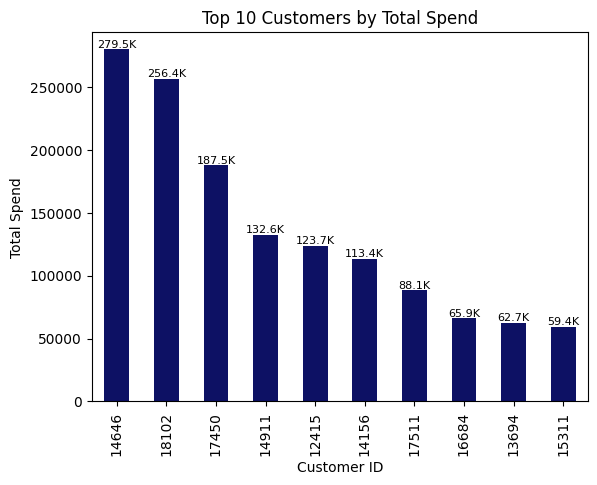

<Figure size 1000x600 with 0 Axes>

In [52]:
ax = top_customers.plot(kind='bar',color='#0D1164' )
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.figure(figsize=(10,6))

for bar in ax.patches:
  value = bar.get_height()
  label = f'{value/1000:.1f}K'
  ax.annotate(
      label,
      (bar.get_x() + bar.get_width() /2, value),
      ha='center',
      va='bottom',
      fontsize=8
  )

plt.show()

Top 10 Products by Revenue

In [29]:
top_pdt_by_revenue = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
top_pdt_by_revenue

,TotalSales
Description,
REGENCY CAKESTAND 3 TIER,132870.40
WHITE HANGING HEART T-LIGHT HOLDER,93823.85
JUMBO BAG RED RETROSPOT,83236.76
PARTY BUNTING,67687.53
POSTAGE,66710.24
ASSORTED COLOUR BIRD ORNAMENT,56499.22
RABBIT NIGHT LIGHT,51137.80
CHILLI LIGHTS,45936.81
PAPER CHAIN KIT 50'S CHRISTMAS,41500.48


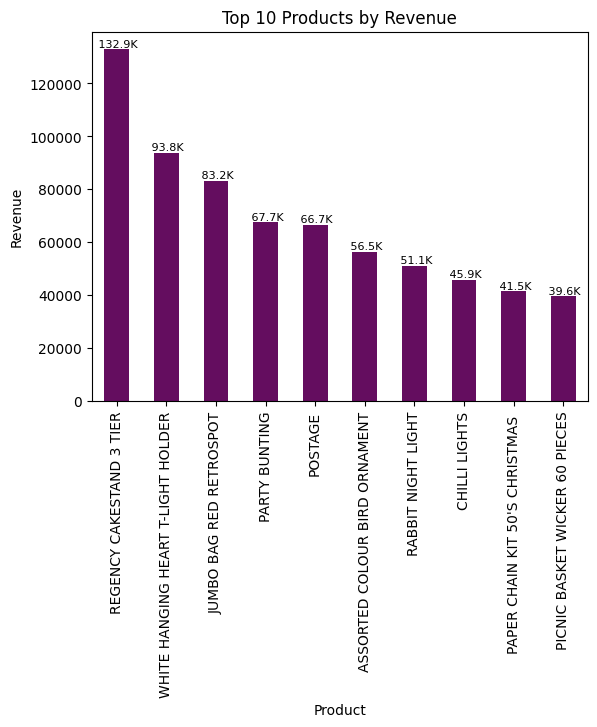

<Figure size 1000x600 with 0 Axes>

In [55]:
ax = top_pdt_by_revenue.plot(kind='bar',color = '#640D5F')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.figure(figsize=(10,6))

for bar in ax.patches:
  value = bar.get_height()
  label = f'{value/1000 : .1f}K'
  ax.annotate(
      label,
      (bar.get_x() +bar.get_width() /2, value),
      ha='center',
      va = 'bottom',
      fontsize = 8
  )
plt.show()

Montly Sales Trend

In [31]:
monthly_sales = (
    df.groupby(['Year', 'Month'])['TotalSales']
      .sum()
      .reset_index()
)


In [32]:
monthly_sales['Date'] = pd.to_datetime(
    monthly_sales['Year'].astype(str) + '-' +
    monthly_sales['Month'].astype(str)
)


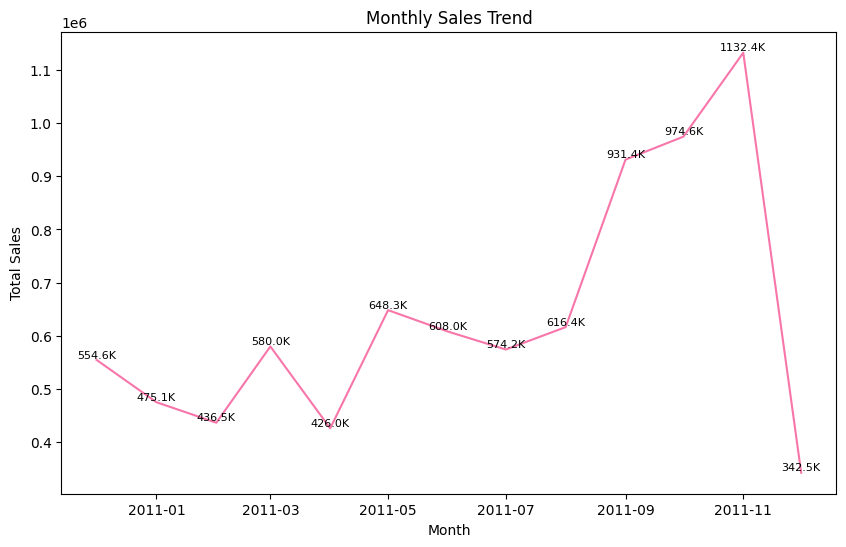

In [58]:
plt.figure(figsize=(10,6))
ax = plt.plot(monthly_sales['Date'], monthly_sales['TotalSales'],color = '#F875AA')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

for x,y in zip(monthly_sales['Date'], monthly_sales['TotalSales']):
  plt.text(
      x,y,
      f'{y/1000:.1f}K',
      ha='center',
      va='bottom',
      fontsize=8
  )
plt.show()

Country Wise analysis


In [39]:
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)
country_sales

,TotalSales
Country,
United Kingdom,6767873.394
Netherlands,284661.540
EIRE,250285.220
Germany,221698.210
France,196712.840
Australia,137077.270
Switzerland,55739.400
Spain,54774.580
Belgium,40910.960


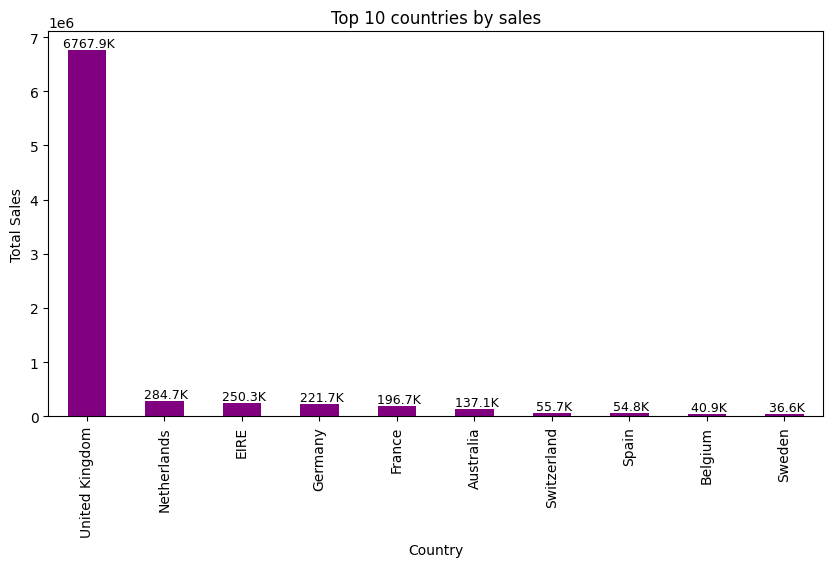

In [62]:
plt.figure(figsize=(10,5))
ax = country_sales.plot(kind='bar',color='#800080')
plt.title('Top 10 countries by sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')


for bar in ax.patches:
  value = bar.get_height()
  label = f'{value/1000: .1f}K'
  ax.annotate(
      label,
      (bar.get_x() + bar.get_width() / 2, value),
      ha ='center',
      va ='bottom',
      fontsize = 9
  )

plt.show()